<a href="https://colab.research.google.com/github/yoonseo96/deeplearning/blob/main/04_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#2023011435 박윤서
import tensorflow as tf
from tensorflow import keras

# 0. 시드 고정
tf.random.set_seed(42)

# 1. Fashion MNIST 데이터 불러오기
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# 2. 데이터 전처리(0~255->0~1)
train_images = train_images.astype('float32') / 255.0
test_images  = test_images.astype('float32')  / 255.0

#채널 축 추가: (28,28) → (28,28,1)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images  = test_images.reshape(-1, 28, 28, 1)

# One-hot 벡터로 변환
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels  = keras.utils.to_categorical(test_labels, 10)

# 3. 모델 정의
model = keras.Sequential([
    #첫번째conv2D
    keras.layers.Conv2D(32, kernel_size=(3,3), padding='same',
                        activation='relu', input_shape=(28,28,1)),
    # 2×2 MaxPooling
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    #두번째conv2D
    keras.layers.Conv2D(64, kernel_size=(3,3), padding='same',
                        activation='relu'),
    # 2×2 MaxPooling
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    #3번째conv2D
    keras.layers.Conv2D(32, kernel_size=(3,3), padding='same',
                        activation='relu'),
    #평탄화 후 출력부분
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32,  activation='relu'),
    keras.layers.Dense(10,  activation='softmax')
])

model.summary()  # 모델 구조 출력

# 4. 컴파일
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 5. 학습
model.fit(train_images, train_labels, epochs=1)

# 6. 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\n테스트 정확도: {test_acc:}')


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 7, 7, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       200,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,570 (947.54 KB)

 Trainable params: 242,570 (947.54 KB)

 Non-trainable params: 0 (0.00 B)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 124s 65ms/step - accuracy: 0.7737 - loss: 0.6102
313/313 - 5s - 16ms/step - accuracy: 0.8822 - loss: 0.3270

테스트 정확도: 0.8822000026702881


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 7, 7, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       200,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,570 (947.54 KB)

 Trainable params: 242,570 (947.54 KB)

 Non-trainable params: 0 (0.00 B)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 129s 67ms/step - accuracy: 0.7675 - loss: 0.6370
313/313 - 5s - 17ms/step - accuracy: 0.8781 - loss: 0.3369

테스트 정확도: 0.8780999779701233


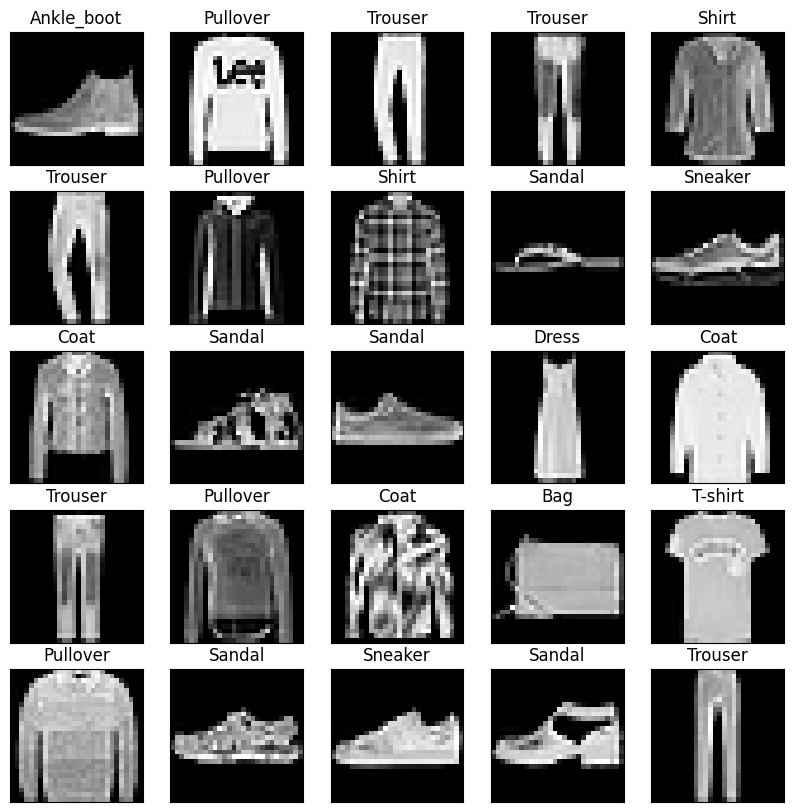

In [5]:
#2023011435 박윤서
import tensorflow as tf
from tensorflow import keras

# 0. 시드 고정
tf.random.set_seed(42)

# 1. Fashion MNIST 데이터 불러오기
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# 2. 데이터 전처리(0~255->0~1)
train_images = train_images.astype('float32') / 255.0
test_images  = test_images.astype('float32')  / 255.0

#채널 축 추가: (28,28) → (28,28,1)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images  = test_images.reshape(-1, 28, 28, 1)

# One-hot 벡터로 변환
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels  = keras.utils.to_categorical(test_labels, 10)

# 3. 모델 정의
model = keras.Sequential([
    #첫번째conv2D
    keras.layers.Conv2D(32, kernel_size=(3,3), padding='same',
                        activation='relu', input_shape=(28,28,1)),
    # 2×2 MaxPooling
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    #두번째conv2D
    keras.layers.Conv2D(64, kernel_size=(3,3), padding='same',
                        activation='relu'),
    # 2×2 MaxPooling
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    #3번째conv2D
    keras.layers.Conv2D(32, kernel_size=(3,3), padding='same',
                        activation='relu'),
    #평탄화 후 출력부분
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32,  activation='relu'),
    keras.layers.Dense(10,  activation='softmax')
])

model.summary()  # 모델 구조 출력

# 4. 컴파일
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 5. 학습
model.fit(train_images, train_labels, epochs=1)

# 6. 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\n테스트 정확도: {test_acc:}')


import numpy as np
import matplotlib.pyplot as plt

#최초 이미지부터 25개 예측
mnist_lbl = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
            'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot']

#이미지 추출
images = test_images[:25]

def plot_images(images, labels, images_per_row=5):
 n_images = len(images)
 n_rows = (n_images-1) // images_per_row + 1
 fig, ax = plt.subplots(n_rows, images_per_row,
                       figsize = (images_per_row * 2, n_rows * 2))
 #각 이미지 그리기
 for i in range(n_rows):
    for j in range(images_per_row):
        if i*images_per_row + j >= n_images: break
        img_idx = i*images_per_row + j
        a_image = images[img_idx].reshape(28,28)
        if n_rows>1: axis = ax[i, j]
        else: axis = ax[j]
        axis.get_xaxis().set_visible(False)
        axis.get_yaxis().set_visible(False)
        label = mnist_lbl[labels[img_idx]]
        axis.set_title(label)
        axis.imshow(a_image, cmap='gray', interpolation='nearest')

plot_images(images, pred, images_per_row = 5)
